In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df=pd.read_csv('../artifacts/raw/Crop_recommendation.csv')

In [96]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [98]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [99]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [100]:
print(df['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [101]:
class_counts = df['label'].value_counts()

In [102]:

plt.figure(figsize=(12,6))

class_counts = df['label'].value_counts()

print(class_counts)

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


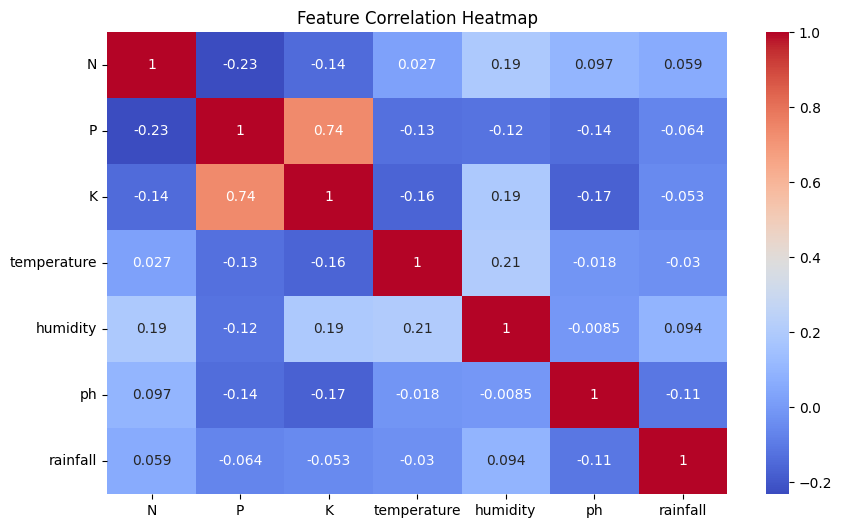

In [103]:
# Basic statistics
print(df.describe())

# Correlation heatmap (features only, not labels)
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns='label').corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [104]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df.drop(columns=['label'])
y = df['label']

# encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\arnab\miniconda3\envs\farmer\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9727272727272728

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00    

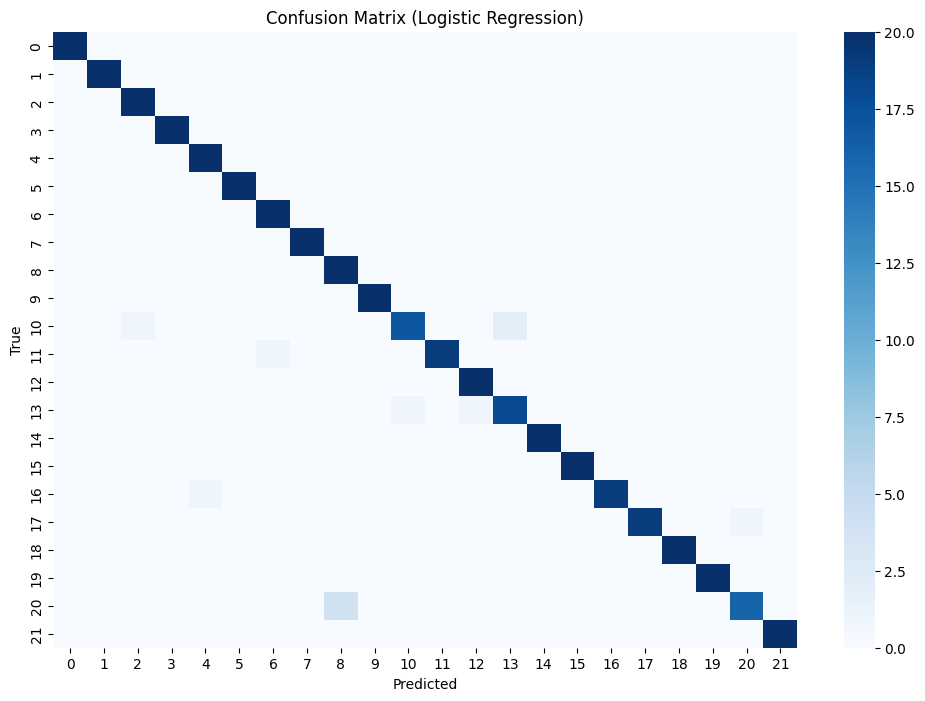

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train Logistic Regression (multinomial)
logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  # number of trees (can reduce to 50 for lighter model)
    max_depth=15,      # limit depth for lightweight deployment
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

# --- Top 5 Predictions ---
y_proba = rf.predict_proba(X_test)

# Get indices of top 5 crops
top5_preds = np.argsort(y_proba, axis=1)[:, -5:][:, ::-1]

# Convert indices to crop labels + probabilities
top5_results = [
    [(le.classes_[idx], round(y_proba[i][idx], 3)) for idx in row]
    for i, row in enumerate(top5_preds)
]

# Show sample outputs
for i in range(5):
    true_crop = le.classes_[y_test[i]]
    print(f"True: {true_crop} | Top-5: {top5_results[i]}")


Random Forest Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange 

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train logistic regression
log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg.fit(X_scaled, y_encoded)

# Predictions
y_pred = log_reg.predict(X_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_encoded, y_pred))
print("\nClassification Report:")
print(classification_report(y_encoded, y_pred, target_names=le.classes_))

# Top-5 prediction function
def get_top_k(model, X, k=5):
    probs = model.predict_proba(X)
    topk_preds = []
    for row in probs:
        topk_idx = np.argsort(row)[::-1][:k]
        topk = [(le.classes_[i], row[i]) for i in topk_idx]
        topk_preds.append(topk)
    return topk_preds

# Example: show Top-5 for first 5 samples
top5_preds = get_top_k(log_reg, X_scaled, k=5)
for true, preds in zip(y[:5], top5_preds[:5]):
    print(f"True: {true} | Top-5: {preds}")


Logistic Regression Accuracy: 0.975

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       100
      banana       1.00      1.00      1.00       100
   blackgram       0.94      0.96      0.95       100
    chickpea       1.00      1.00      1.00       100
     coconut       0.98      1.00      0.99       100
      coffee       0.99      1.00      1.00       100
      cotton       0.99      0.99      0.99       100
      grapes       1.00      1.00      1.00       100
        jute       0.85      0.93      0.89       100
 kidneybeans       0.97      0.99      0.98       100
      lentil       0.94      0.95      0.95       100
       maize       0.99      0.99      0.99       100
       mango       0.99      1.00      1.00       100
   mothbeans       0.97      0.92      0.94       100
    mungbean       0.99      1.00      1.00       100
   muskmelon       1.00      1.00      1.00       100
      orange       1.

In [108]:
# %% Save model pipeline
import joblib

# save scaler, encoder, and model
joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(le, "../models/label_encoder.pkl")
joblib.dump(log_reg, "../models/log_reg_model.pkl")

print("✅ Model, scaler, and encoder saved.")


✅ Model, scaler, and encoder saved.


In [109]:
import numpy as np
import joblib
import pandas as pd

# Load artifacts
scaler = joblib.load("../models/scaler.pkl")
le = joblib.load("../models/label_encoder.pkl")
model = joblib.load("../models/log_reg_model.pkl")


def recommend_crop(N, P, K, temperature, humidity, ph, rainfall, top_k=5):
    clipped = max(min(rainfall, 298.560117), 20.211267)
    # create input as DataFrame with feature names
    features = pd.DataFrame([{
        "N": N,
        "P": P,
        "K": K,
        "temperature": temperature,
        "humidity": humidity,
        "ph": ph,
        "rainfall": clipped
    }])
    
    # scale
    features_scaled = scaler.transform(features)
    
    # get probability distribution
    probs = model.predict_proba(features_scaled)[0]
    
    # sort top-k
    top_k_idx = np.argsort(probs)[::-1][:top_k]
    top_k_labels = le.inverse_transform(top_k_idx)
    top_k_probs = probs[top_k_idx]
    
    return list(top_k_labels)



In [110]:
print(recommend_crop(90, 42, 43, 20.8, 82.0, 6.5, 203))

['rice', 'jute', 'coffee', 'maize', 'watermelon']


In [111]:
max_rainfall = df['rainfall'].max()
print("Maximum annual rainfall in dataset:", max_rainfall, "mm")

Maximum annual rainfall in dataset: 298.5601175 mm


In [112]:
rain_min = df['rainfall'].min()
rain_max = df['rainfall'].max()
print(f"Dataset rainfall range: {rain_min} – {rain_max} mm (scaled units)")


Dataset rainfall range: 20.21126747 – 298.5601175 mm (scaled units)


In [113]:
def scale_rainfall(real_rainfall, df):
    rain_min = df['rainfall'].min()
    rain_max = df['rainfall'].max()
    
    # clip real rainfall to dataset range
    clipped = max(min(real_rainfall, rain_max), rain_min)
    
    return clipped


In [114]:
scale_rainfall(655, df)

np.float64(298.5601175)

In [115]:
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
feature_ranges = df[feature_cols].agg(['min', 'max', 'mean']).T
feature_ranges

,min,max,mean
N,0.000000,140.000000,50.551818
P,5.000000,145.000000,53.362727
K,5.000000,205.000000,48.149091
temperature,8.825675,43.675493,25.616244
humidity,14.258040,99.981876,71.481779
ph,3.504752,9.935091,6.469480
rainfall,20.211267,298.560117,103.463655
